# Stokes drifters

In [2]:
# import needed packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy
import cartopy.crs as ccrs
import numpy as np



In [3]:
# define needed functions
def Buoyancy_drifter(d, h, m, rho_water):
    V = 0.25 * np.pi * d * d * h
    rho_drifter = m / V
    B = rho_drifter/ rho_water
    return B

def stokes_relaxation_time(d, viscosity_water, B):
    return (1 + 2 * B) * d * d / (36 * viscosity_water)


In [8]:
d = 0.24  # m diameter outer ring
d_in = 0.20 # m (estimated) dimater inner ring, needed to caluclate volume
h = 0.041  # m (heigth drifter)
m = 0.905 # kg (mass drifter)
rho_water = 1027 # kg/m3 https://www.engineeringtoolbox.com/sea-water-properties-d_840.html (at 10 deg)
dynamic_viscosity_water = 1.41 * 10**(-3) # kg/(ms) https://www.engineeringtoolbox.com/sea-water-properties-d_840.html (at 10 deg)
kinematic_viscosity_water = dynamic_viscosity_water / rho_water
B = Buoyancy_drifter(d_in, h, m, rho_water)
tau = stokes_relaxation_time(d, kinematic_viscosity_water, B)
print(f'B = {B:.2f}')
print(f'tau = {tau:.2f}')


B = 0.68
tau = 2759.97


In [6]:
tau * 2 * (1 - B) / (2 * B + 1)  
tau/60 # minutes, quite similar to sargassum paper where they have 59 minutes)

45.99946463669082

In [4]:
# test displacement code

def displace_coordinates(lon, lat, d, B):
    """
    Function that displaces point(s) given by lon, lat over a distance d
    (in meters) in direction B (angle measured clockwise in radians from the
    north pole). The function returns the lon and lat coordinates of the
    displaced point(s).
    """
    Rearth = 6371 * 10**3 # radius earth in m
    lon_rad = lon * np.pi/180. 
    lat_rad = lat * np.pi/180. 
    lat_new = np.arcsin(np.sin(lat_rad) * np.cos(d / Rearth)+np.cos(lat_rad) * np.sin( d/ Rearth) * np.cos(B))
    lon_new = lon_rad + np.arcsin( np.sin(d / Rearth) * np.sin(B) / np.cos(lat_new))
    lat_new_angle = lat_new * 180/np.pi 
    lon_new_angle = lon_new * 180/np.pi 
    return lon_new_angle, lat_new_angle




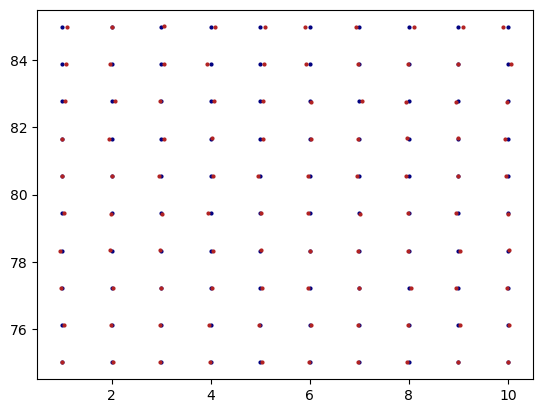

In [7]:
lon = np.linspace(1,10,10)
lat = np.linspace(75,85,10)
lon_particles, lat_particles = np.meshgrid(lon,lat)
lon_particles = lon_particles.flatten()
lat_particles = lat_particles.flatten()
nparticles=lat_particles.size
d = 1000 # displacement in meters
theta = np.random.rand(nparticles)*2*np.pi

lon_d, lat_d = displace_coordinates(lon_particles,lat_particles,d,theta)

fig,ax = plt.subplots()
ax.plot(lon_particles,lat_particles, 'o',color='navy',markersize=2)
ax.plot(lon_d,lat_d, 'o',color='firebrick',markersize=2)

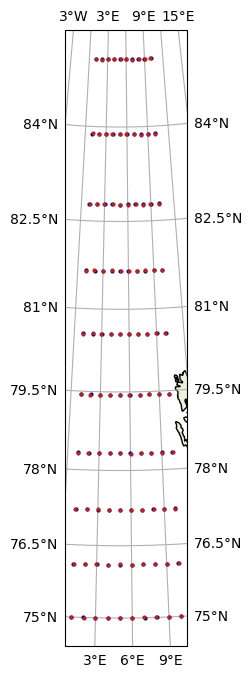

In [16]:

proj = ccrs.LambertConformal(central_longitude=5, central_latitude=80)

fig, ax = plt.subplots(facecolor="w", figsize=(20,8),
    subplot_kw=dict(projection=proj),
)

    
ax.plot(lon_particles,lat_particles, 'o',color='navy',markersize=2,zorder=20, transform=ccrs.PlateCarree())
ax.plot(lon_d,lat_d, 'o',color='firebrick',markersize=2,zorder=20, transform=ccrs.PlateCarree())

# ax.set_extent((1, 10, 75, 85))
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='k')
gl = ax.gridlines(
    draw_labels=True, rotate_labels=False,
    x_inline=False, y_inline=False,
)